### パーセプトロン
http://tkengo.github.io/blog/2016/06/03/yaruo-machine-learning4/

#### 寒色・暖色データの用意

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
from PIL import Image
jtplot.style()
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

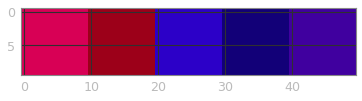

In [78]:
#サンプル 入力はカラーコードで
sampleCCs = ['#d80055',
            '#9c0019',
            '#2c00c8',
            '#120078',
            '#40009f']
#暖色=0, 寒色=1のラベル
sampleLabels = [1,1,-1,-1,-1]
#カラーコードをRGBに変換
sampleColors = [(int(c[1:3],16),int(c[3:5],16),int(c[5:7],16)) for c in sampleCCs]


#サンプル色を正方形で描画
size1 = 10

canvas = Image.new('RGB', (size1 * len(sampleCCs),size1), (0,0,0))

for i,col in enumerate(sampleColors):
    img = Image.new('RGB', (size1,size1), col)
    canvas.paste(img, (size1*i, 0))

plt.imshow(np.asarray(canvas));


[216, 156, 44, 18, 64]

[85, 25, 200, 120, 159]

[1, 1, -1, -1, -1]

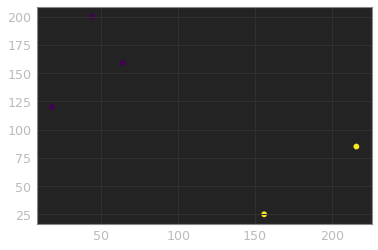

In [79]:
#G=0なのでRとBだけ取り出して2次元へマッピング
sampleRs = [col[0] for col in sampleColors]
sampleBs = [col[2] for col in sampleColors]
sampleRs
sampleBs
sampleLabels

plt.scatter(sampleRs, sampleBs, c=sampleLabels)

#### パーセプトロンを用いて分類

パーセプトロン…入力とその入力に対する重みの線形結合が閾値を超えていた場合に活性化するモデル

今回は単相パーセプトロンとして、上記のサンプルを分類するような直線を引くことを考える。

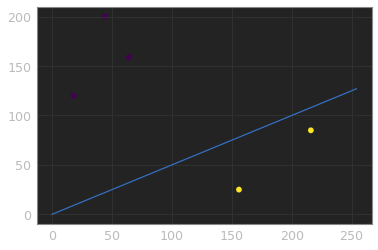

In [80]:
plt.scatter(sampleRs, sampleBs, c=sampleLabels)
plt.plot(np.arange(0,255), np.arange(0,255)*1/2)

#### 識別関数と更新式

識別関数を

$
f_w(\boldsymbol{x}) = \left\{
\begin{array}{ll}
1 & (\boldsymbol{w \bullet x} \geq 0) \\
-1 & (\boldsymbol{w \bullet x} \lt 0)
\end{array}
\right.
$

と定義する。

これは$\boldsymbol{w・x=0}$なる関数において、片側で-1, もう片側で1を返す関数である。

この識別関数を用いて、wを以下のように更新する。

f(xi) != yiのとき（つまり分類が間違っている時）

$
\boldsymbol{w+y^{(i)}x^{(i)}} 
$

f(xi) == yiのとき（つまり分類が合っている時）

$
\boldsymbol{w} 
$

へ更新

分類が間違っている時更新する。

パーセプトロンの実装は行った事があるため割愛

### ロジスティック回帰による線形分離

#### 回帰とロジスティック回帰

#####  ○回帰（2次元ベクトルxに対して）
<img src="img/2d-Regression.jpg" width=400px>
予測関数fθ(x)が、教師データにフィッティングするように重みθを更新する

予測関数の形は教師データに対して検討する必要がある


##### ○ ロジスティック回帰
<img src="img/2d-logistic-Regression.jpg" width=400px>
(上記図中のfθ(x)はσ(f), f(x)がf(x,θ))

教師データをうまく分類するようなf(x,θ)を考える

これをシグモイド関数に入れたσ(f)は出力が0～1で、f(x,θ)=0でσ(f)=0.5となる確率として出力される

全ての教師データが正しいクラスに分類されるθが得られる、すなわちσ(f)で得られる確率について、正しいクラスに分類される同時確率が最大になるようにθを決める

　

　
#### ○ロジスティック回帰適用
シグモイド関数は以下のように定義される

$
f_θ (\boldsymbol{x}) = 1/(1+exp(-\boldsymbol{θ^Tx}))
$

これは$P(y=1|\boldsymbol{x})$、すなわちxが暖色である確率である

ここで、$\boldsymbol{θ^Tx}$は回帰の時のように定数項x0=0, θ0を含むとする

この$f_θ$を確率と見た時、各教師データ$\boldsymbol{x_i}$について、正しいクラスに分類されている確率は$(f_θ(\boldsymbol{x_i}))^{y_i}(1-f_θ(\boldsymbol{x_i}))^{1-y_i}$

同時確率は

$F=\prod(f_θ(\boldsymbol{x_i}))^{y_i}(1-f_θ(\boldsymbol{x_i}))^{1-y_i}$

となる。

この同時確率をθを動かして最大化する。この時、これは尤度関数となっているが、此のままでは扱いにくいため対数尤度関数とする。

最終的に対数尤度関数の微分は

$\frac{\partial \log F}{\partial θ_j}=\sum^n_i \{y^{(i)}-f_θ(\boldsymbol{x^{(i)}})\}x^{(i)}_j$ 

となる。
最大化しなければいけないので符号を反転し、

$G_j = \frac{\partial -\log F}{\partial θ_j}=\sum^n_i \{f_θ(\boldsymbol{x^{(i)}})-y^{(i)}\}x^{(i)}_j$ 

最急降下法で

$θ_j := θ_j-ηG_j$

と更新する

#### データ準備
ロジスティック回帰用に重み（fθを決定するパラメータ）を初期化、ラベルを変更, 教師データを正規化

以降データとなる[1,R,B]値は正規化されたものになる

In [81]:
#ラベルを寒色=0に変更
sampleLabels = [1,1,0,0,0]
#th0～th2を適当に初期化
th = np.array([0.1,0.5,-0.7])

#教師データに定数項x0=1を追加し、n行3列のデータになるよう並べ直し、さらに正規化
samp = []
ones = [1.0 for x in sampleRs]
samp.append(ones)
samp.append(sampleRs)
samp.append(sampleBs)
sampleAddConstT = np.array(samp)
sampleAddConst = sampleAddConstT.T/255.0
del sampleRs
del sampleBs
sampleAddConst

array([[ 0.00392157,  0.84705882,  0.33333333],
       [ 0.00392157,  0.61176471,  0.09803922],
       [ 0.00392157,  0.17254902,  0.78431373],
       [ 0.00392157,  0.07058824,  0.47058824],
       [ 0.00392157,  0.25098039,  0.62352941]])

#### シグモイド関数の確認
シグモイド関数をpython関数として用意、ついでにpyplotで表示してみる

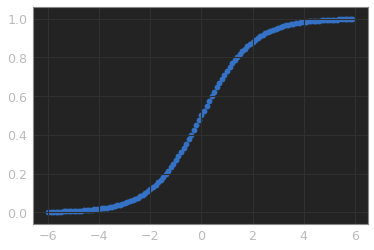

In [82]:
#通常の1引数シグモイド関数
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

#今回の識別関数用にσ(θx)を計算する関数
def sigmoidP(thArr,xArr):
    return sigmoid(np.dot(thArr,xArr))
    #print (np.exp(-1.0*np.dot(thArr,xArr)))

#サンプル点の用意
graphX = np.arange(-6,6,0.1)
plt.scatter(graphX, sigmoid(graphX))


#### 識別関数をシグモイド関数に入れた時の値の可視化
ランダムなR(G)Bデータを作成し、それに対してシグモイド関数を適用してみる

θが適当なのでまったく正しくはないが、現時点のθにおけるクラス分類確率がヒートマップで出る

たとえば以下でRGB=(150,0,30)の辺りは黄色になっているためシグモイド関数の値は0.8程度と見ることができる

追加で教師データもプロットする

シグモイド関数の値の可視化と教師データのグラフ


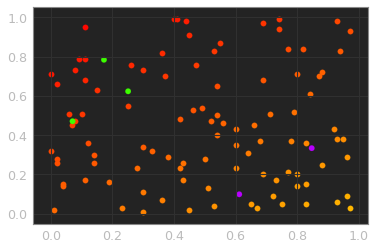

In [83]:
import matplotlib.cm as cm

#可視化のためのランダム点作成
randOnes = np.ones(shape=(100,1))
randSampleR = np.random.choice(np.arange(0.0,1.0,0.01),size=(100,1))
randSampleB = np.random.choice(np.arange(0.0,1.0,0.01),size=(100,1))
randVec = np.empty(shape=(100,3))
randVec[:,0] = randOnes[:,0]
randVec[:,1] = randSampleR[:,0]
randVec[:,2] = randSampleB[:,0]

#ランダム点に対してシグモイド関数を適用した値をプロットし、識別関数の様子を見る
def showSigmoidP(randSample, thArr, axis1=1, axis2=2):
    for s in randSample:
        ret = plt.scatter(s[axis1],s[axis2],c=cm.hot(sigmoidP(thArr,s)))

showSigmoidP(randVec,th)

#教師データも別色でプロット
colLabel = [0.3+l/2.0 for l in sampleLabels]
ret = plt.scatter(sampleAddConst[:,1], sampleAddConst[:,2], c=cm.hsv(colLabel))

print("シグモイド関数の値の可視化と教師データのグラフ")


なお、各教師データにおける、暖色に分類される確率は以下のようになっている

In [84]:
for sam in sampleAddConst:
    sigmoidP(sam, th)

0.54750335364142688

0.55913372268857542

0.38642778945884126

0.42709205100885012

0.42297116380279109

0.5前後と、まだ曖昧である。
ここからθを更新して教師データに対して正しく分類できるようにする

#### θの更新

0.9999426383406147

0.9999869079021072

5.347266607044924e-09

5.0892381795311159e-06

3.67111798721689e-06

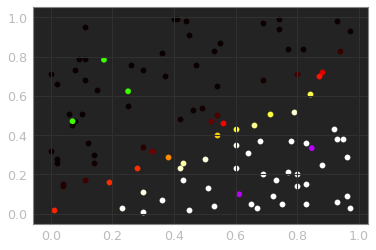

In [87]:
#学習を行い、重みthetaを更新して返す
#sample 行に1データ、列に素性が並んだ2次元ndArray
#theta 初期の重み
#trainRoop 学習回数
#eta 学習収束係数
def train(sample, labels, thetas, trainRoop, eta=50, logFlg=True):    
    for n in range(trainRoop):
        G = [0,0,0];
        for j in range(sample.shape[1]):    
            for i,samp in enumerate(sample):
                G[j] = G[j] + (sigmoidP(thetas, samp)-labels[i])*samp[j]
        if logFlg:
            print("G=",G)
            print("thOld=",thetas)
        thetas = thetas - eta * np.array(G)
        if logFlg:
            print("thNew=",thetas)
    return thetas

#for n in range(30):
#    G = [0,0,0];
#    for j in range(sampleAddConst.shape[1]):    
#        for i,samp in enumerate(sampleAddConst):
#            G[j] = G[j] + (sigmoidP(th, samp)-sampleLabels[i])*samp[j]
#    print("G=",G)
#    print("thOld=",th)
#    th = th - 50 * np.array(G)
#    print("thNew=",th)

th = train(sampleAddConst, sampleLabels, th, 10, logFlg=True)

showSigmoidP(randVec, th)

for sam in sampleAddConst:
    sigmoidP(sam, th)

colLabel = [0.3+l/2.0 for l in sampleLabels]
ret = plt.scatter(sampleAddConst[:,1], sampleAddConst[:,2], c=cm.hsv(colLabel))


識別関数が教師データを分類するように変形しているのが分かる